<center><h1>Proyecto final</h1></center>
<center><h3>IBM SkillsBuild Europa - Análisis de datos</h3></center>

#Conecto con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Requisitos



* Conocimientos de Python, Power BI o Tableau.
* Comprensión de la limpieza de datos.
* Comprensión de la visualización de datos.

### Análisis de datos de Airbnb:



#### Objetivo:



En este ejercicio, practicarás el análisis de datos sobre un conjunto de datos abiertos procedentes de Airbnb. Algunas de las tareas incluyen:

- limpieza de datos,
- transformación de datos y
- visualización de datos.



#### Resumen sobre los datos de Airbnb:



Los criterios principales de la gente cuando visita lugares nuevos son contar con alojamiento y comida a precios razonables. Airbnb (Air-Bed-Breakfast) es un mercado en línea creado para satisfacer esta necesidad, pues permite a la gente alquilar sus casas durante plazos cortos. Estos servicios se ofrecen a un precio relativamente inferior al de los hoteles y en diversas ubicaciones geográficas. Además, personas de todo el mundo prefieren el servicio hogareño y económico.



#### Fuente de los datos



Puedes obtener el <i>dataset</i> para realizar este proyecto en el siguiente enlace: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata



Este <i>dataset</i> contiene información sobre los alojamientos, tal como el barrio, el tipo de habitación, el precio, la disponibilidad, las opiniones, los gastos de servicio, la política de cancelación y las normas de uso de la casa.



¡Te deseamos lo mejor en tu análisis de los datos de Airbnb!

# Tarea 1: Carga de datos (Python)



1. Lee el fichero csv y cárgarlo en un <i>dataframe</i> de pandas.
2. Visualiza las cinco primeras filas de tu <i>dataframe</i>.
3. Visualize los tipos de datos de las columnas.

In [2]:
## Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
## Lee el fichero csv.
df = pd.read_csv("/content/drive/MyDrive/Airbnb_Open_Data_.csv", sep=',')

<ipython-input-3-beade9405209>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Airbnb_Open_Data_.csv", sep=',')


In [4]:
## Muestra las primeras 5 filas.
df.head(5)

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [5]:
## Muestra los tipos de datos.
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

# Tarea 2

## Tarea 2a: Limpieza de datos (cualquier herramienta)


1. Elimina las columnas no deseadas del <i>dataframe</i>, entre ellas se incluyen `host id`, `id`, `country` y `country code`.
2. Indica la razón por la cual se han eliminado estas columnas para tu análisis de datos.


Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla tomadas antes y después de eliminar las columnas.

In [6]:
print(df[['country', 'country code']].value_counts())

country        country code
United States  US              102024
dtype: int64


In [7]:
print(df.shape)
df.drop(columns= ['host id', 'id', 'country', 'country code'], inplace = True)
df.columns
print(df.shape)

(102599, 26)
(102599, 22)


* **Host_id**  y **id** son columnas que poseen un identificador sin información significativa,  que no se consideran necesarias o que aporten al analisis, solo sería escencial mantenerlo si es un campo utilizado para el enlace entre tablas, sin embargo no es el caso asi que procedemos a eliminarlas.

* **country** y **country code**  se eliminan ya todos los datos corresponden al mismo país (US), por lo que no nos aporta valor tener esta variable.

## Tarea 2b: Limpieza de datos (Python)


- Compueba si hay valores nulos y muestra el recuento en orden ascendente. **Si faltan valores, imputa los valores como consideres.**
- Comprueba si hay valores duplicados y elimínalos.
- Muestra el número total de registros antes y después de eliminar los duplicados.

In [8]:
## Comprueba si hay valores nulos y muestra el recuento en orden ascendente.
print(df.isna().sum().sort_values(ascending= True))

room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64


In [9]:
## Comprueba si hay valores duplicados y elimínalos.
duplicados = df[df.duplicated(keep=False)]
duplicados.duplicated().sum()

3436

In [10]:
## Muestra el número total de registros antes y después de eliminar los duplicados.
print(f'DataFrame Original: {df.shape}')
print(f'Cantidad de duplicados:{duplicados.shape}')
df.drop_duplicates(keep= False,inplace=True)
print(f'DataFrame Sin duplicados: {df.shape}')

DataFrame Original: (102599, 22)
Cantidad de duplicados:(6779, 22)
DataFrame Sin duplicados: (95820, 22)


## Tarea 2c: Limpieza Extra

Eliminamos License ya que tiene solo dos valores que no son nulos y no nos aporta información a nuestro analisis

In [11]:
print(df.shape)
print(df['license'].isna().sum())
df.drop(columns= ['license'], inplace = True)
print(df.shape)

(95820, 22)
95818
(95820, 21)


# Tarea 3: Transformación de datos (cualquier herramienta)





- Cambia el nombre de la columna `availability 365` a `days_booked`.
- Convierte todos los nombres de columna a minúsculas y sustituye los espacios en los nombres de columna por un guión bajo "_".
- Elimina el signo de dólares y la coma de las columnas `price` y `service_fee`. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [12]:
## Cambia el nombre de la columna.
df.rename(columns={"availability 365": "days_booked"}, inplace=True)
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'days_booked', 'house_rules'],
      dtype='object')

In [13]:
## Convierte todos los nombres de columna a minúsculas y sustituye los espacios por un guión bajo "_".

# Obtener los nombres actuales de las columnas
col = df.columns.tolist()

# Convertir los nombres de las columnas a minúsculas
new_col = [columna.lower().replace(" ", "_") for columna in col]

# Asignar los nuevos nombres de las columnas al dataframe
df.columns = new_col
df.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules'],
      dtype='object')

In [14]:
## Elimina el signo de dólares y la coma de las columnas. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').str.strip()
df['service_fee'] = df['service_fee'].str.replace('$', '').str.replace(',', '').str.strip()
df.price.astype(float)
df.service_fee.astype(float)
df[['price', 'service_fee']]

<ipython-input-14-d13a6bee1a61>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').str.strip()
<ipython-input-14-d13a6bee1a61>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service_fee'] = df['service_fee'].str.replace('$', '').str.replace(',', '').str.strip()


price service_fee
0        966         193
1        142          28
2        620         124
3        368          74
4        204          41
...      ...         ...
102053   696         NaN
102054   909         NaN
102055   387         NaN
102056   848         NaN
102057  1128         NaN

[95820 rows x 2 columns]

## Tarea 3  Transformación de datos EXTRA

* Imputamos valores faltantes con el valor mas frecuente

In [15]:
df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0], inplace=True)
df['instant_bookable'].fillna(df['instant_bookable'].mode()[0], inplace=True)

* Imputamos los na con 0 en la variable numero de reviews
* Imputamos los na con "unconfirmed" en la variable "host_identity_verified", suponiendo que estan a 0 porque no escan confirmados.

In [16]:
df['number_of_reviews'].fillna(0, inplace=True)
df['host_identity_verified'].fillna('unconfirmed', inplace=True)

* Convertimos la columnas "last review"  cambiando su tipo a datetime

In [17]:
df['last_review'] = pd.to_datetime(df['last_review'])
# Verificar el nuevo tipo de datos de la columna
print(df['last_review'].dtypes)

datetime64[ns]


* Imputamos los na en la variable "precio" como 0
* Imputamos los na en la variable "minimum_nights" como 0

In [18]:
df['price'] = pd.to_numeric(df['price'])
df['price'].fillna(0, inplace=True)
print(df['price'].isna().sum())
df = df[df['price'] != 0]

df['minimum_nights'].fillna(0, inplace=True)

0


<ipython-input-18-65e052375141>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minimum_nights'].fillna(0, inplace=True)


In [19]:
# Convertir 'service_fee' a tipo numérico
df['service_fee'] = pd.to_numeric(df['service_fee'], errors='coerce')
# Eliminar filas con valores nulos en 'service_fee'
df = df.dropna(subset=['service_fee', 'long', 'lat'])
df.head()

<ipython-input-19-adace844d974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service_fee'] = pd.to_numeric(df['service_fee'], errors='coerce')


name host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !            unconfirmed   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host_name neighbourhood_group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

   instant_bookable cancellation_policy        room_type  ...  price  \
0             False              strict     Private room  ...  966.0   
1             False            moderate  Entire home/apt  ...  142.0   
2              True            flexible     Private room  ...  620.0   
3              True            moderate  Entire home/apt  ...  368.0   
4             False            moderate  Entire home/apt  ...  204.0   

   service_fee  minimum_nights  number_of_reviews  last_review  \
0        193.0            10.0                9.0   2021-10-19   
1         28.0            30.0               45.0   2022-05-21   
2        124.0             3.0                0.0          NaT   
3         74.0            30.0              270.0   2019-07-05   
4         41.0            10.0                9.0   2018-11-19   

  reviews_per_month  review_rate_number  calculated_host_listings_count  \
0              0.21                 4.0                             6.0   
1              0.38                 4.0                             2.0   
2               NaN                 5.0                             1.0   
3              4.64                 4.0                             1.0   
4              0.10                 3.0                             1.0   

   days_booked                                        house_rules  
0        286.0  Clean up and treat the home the way you'd like...  
1        228.0  Pet friendly but please confirm with me if the...  
2        352.0  I encourage you to use my kitchen, cooking and...  
3        322.0                                                NaN  
4        289.0  Please no smoking in the house, porch or on th...  

[5 rows x 21 columns]

* Eliminamos las filas que tienen como last_review una fecha futura

In [20]:
df[df['last_review'] > '2023-07-01']

name host_identity_verified host_name  \
127   Garden studio in the Upper East Sid            unconfirmed    Miller   
191  LUX APT IN TIMES SQUARE NEW BUILDING            unconfirmed     Aiden   
255           Beautiful Landmarked Duplex            unconfirmed     Baker   
318                                   NaN               verified    Barnes   
483      Modern Space in Charming Pre-war               verified  Adelaide   

    neighbourhood_group    neighbourhood       lat      long  \
127           Manhattan  Upper East Side  40.77800 -73.94822   
191           Manhattan   Hell's Kitchen  40.76307 -73.99665   
255            Brooklyn       Greenpoint  40.72945 -73.95511   
318            Brooklyn       Greenpoint  40.72488 -73.95018   
483           Manhattan           Harlem  40.82411 -73.94934   

     instant_bookable cancellation_policy        room_type  ...  price  \
127             False              strict  Entire home/apt  ...  571.0   
191             False            moderate  Entire home/apt  ...  539.0   
255              True            moderate  Entire home/apt  ...  842.0   
318              True            flexible     Private room  ...  920.0   
483             False            flexible     Private room  ...  721.0   

     service_fee  minimum_nights  number_of_reviews  last_review  \
127        114.0             5.0               21.0   2024-08-15   
191        108.0             0.0               41.0   2025-06-26   
255        168.0             3.0              124.0   2058-06-16   
318        184.0             2.0                1.0   2026-03-28   
483        144.0             2.0               41.0   2040-06-16   

    reviews_per_month  review_rate_number  calculated_host_listings_count  \
127              0.19                 4.0                             NaN   
191              0.38                 2.0                             1.0   
255              1.22                 4.0                             3.0   
318              0.01                 3.0                             1.0   
483              0.43                 3.0                             2.0   

     days_booked                                        house_rules  
127        395.0  Dear Guests, Welcome to 62 Cornwall St! I hope...  
191          NaN  You will be sharing a bathroom, so you must be...  
255        230.0  No rules per say. I just ask that you respect ...  
318         73.0  Check-In is 3pm.  Check-Out is 12 Noon.  In or...  
483         47.0                                                NaN  

[5 rows x 21 columns]

In [21]:
# Convertir la columna 'last_review' a formato datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Filtrar y eliminar filas con fecha mayor a '2023-07-01'
df = df[df['last_review'] <= '2023-07-01']

# Mostrar el DataFrame resultante
print(df)

                                                     name  \
0                      Clean & quiet apt home by the park   
1                                   Skylit Midtown Castle   
3                                                     NaN   
4        Entire Apt: Spacious Studio/Loft by central park   
5               Large Cozy 1 BR Apartment In Midtown East   
...                                                   ...   
102040                      Room in Queens, NY, near LGA.   
102041                           Cozy home away from home   
102042       Central Park Views - Private Room & Bathroom   
102043  Ultimate 50th Floor Downtown Penthouse  - 4000...   
102044    Lovely Two Bedroom & Event Space From Nonprofit   

       host_identity_verified host_name neighbourhood_group  \
0                 unconfirmed  Madaline            Brooklyn   
1                    verified     Jenna           Manhattan   
3                 unconfirmed     Garry            Brooklyn   
4              

* Imputamos valores NaT con en last_review con la fecha del registro anterior

In [22]:
#Ordenamos por indice el dataframe,  los "NaT"  en la variable last_review con el valor de la fecha anterior
df = df.sort_index()

# Imputar los NaN con el valor anterior usando forward fill (ffill)
df['last_review'] = df['last_review'].fillna(method='ffill')

print(df['last_review'].isna().sum())

0


* Imputamos los valores NaN con la media de las reviews por mes en ese vecindario

In [23]:
# Calcular la media de 'reviews_per_month' por vecindario
na_por_vecindario = df.groupby('neighbourhood')['reviews_per_month'].apply(lambda x: x.isna().sum())

# Imprimir la cantidad de NaN por cada vecindario
na_mayor_cero = na_por_vecindario[na_por_vecindario > 0]
print(na_mayor_cero)

neighbourhood
Bath Beach            1
Bedford-Stuyvesant    1
Brooklyn Heights      2
Chelsea               1
Clinton Hill          1
DUMBO                 1
East Village          1
Gowanus               1
Harlem                1
Upper East Side       1
Williamsburg          1
Name: reviews_per_month, dtype: int64


In [24]:
#Calculamos la media de reviews por mes de cada vecindario
media_por_vecindario = df.groupby('neighbourhood')['reviews_per_month'].mean()

# Imprimir la media de 'reviews_per_month' solo para los vecindarios que tienen valores faltantes mayores a 0
media_na_mayor_cero = media_por_vecindario[media_por_vecindario.index.isin(na_mayor_cero.index)]
print(media_na_mayor_cero)

neighbourhood
Bath Beach            1.869000
Bedford-Stuyvesant    1.549939
Brooklyn Heights      0.956504
Chelsea               1.415965
Clinton Hill          0.998920
DUMBO                 1.561837
East Village          1.142205
Gowanus               1.364950
Harlem                1.317491
Upper East Side       1.005685
Williamsburg          1.101130
Name: reviews_per_month, dtype: float64


**Comprobamos que se han imputado las medias correctamente en  los valores NaN**

In [25]:
#Valores que tenemos de ejemplo con NaN
print(df[['reviews_per_month', 'neighbourhood']].loc[163:164].sort_values(by=['neighbourhood'], ascending=False))
# Imputar los NaN con la media correspondiente al vecindario
df['reviews_per_month'] = df.apply(lambda row: media_por_vecindario[row['neighbourhood']] if pd.isna(row['reviews_per_month']) else row['reviews_per_month'], axis=1)
#La fila 163 corresponde al valor de Bedford-Stuyvesant y la 164 de DUMBO (Ambos con NaN en reviews_per_month)
print(df[['reviews_per_month', 'neighbourhood']].loc[163:164].sort_values(by=['neighbourhood'], ascending=False))

     reviews_per_month       neighbourhood
164                NaN               DUMBO
163                NaN  Bedford-Stuyvesant
     reviews_per_month       neighbourhood
164           1.561837               DUMBO
163           1.549939  Bedford-Stuyvesant


* Modificamos la palabra brookln, deberia ser brooklyn

In [26]:
filtro = (df['neighbourhood_group'] == 'brookln')
resultado = df.loc[filtro]
resultado

name host_identity_verified  \
13  Lovely Room 1, Garden, Best Area, Legal rental               verified   

   host_name neighbourhood_group neighbourhood       lat      long  \
13     Darcy             brookln   South Slope  40.66829 -73.98779   

    instant_bookable cancellation_policy     room_type  ...  price  \
13              True            moderate  Private room  ...  580.0   

    service_fee  minimum_nights  number_of_reviews  last_review  \
13        116.0             4.0              167.0   2019-06-24   

   reviews_per_month  review_rate_number  calculated_host_listings_count  \
13              1.34                 4.0                             3.0   

    days_booked  house_rules  
13         47.0          NaN  

[1 rows x 21 columns]

In [27]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace('brookln', 'Brooklyn')

* Imputamos la moda de la variable neighbourhood_group para cada vecindario

In [28]:
# Obtener la lista de vecindarios únicos
neighbourhoods = df['neighbourhood'].unique()

# Iterar sobre los vecindarios
for neighbourhood in neighbourhoods:
    # Crear una máscara booleana para las filas que cumplen la condición
    mask = (df['neighbourhood'] == neighbourhood) & (df['neighbourhood_group'].isna())

    # Verificar si hay valores presentes en 'neighbourhood_group' para el vecindario actual
    if df.loc[df['neighbourhood'] == neighbourhood, 'neighbourhood_group'].notna().any():
        # Obtener el valor más frecuente en 'neighbourhood_group' para el vecindario actual
        most_frequent_group = df.loc[df['neighbourhood'] == neighbourhood, 'neighbourhood_group'].mode()[0]

        # Imputar los valores más frecuentes en 'neighbourhood_group' para el vecindario actual
        df.loc[mask, 'neighbourhood_group'] = df.loc[mask, 'neighbourhood_group'].fillna(most_frequent_group)


* Imputamos la moda para la variable neighbourhood

In [29]:
# Obtener la lista de vecindarios únicos
neighbourhood_group = df['neighbourhood_group'].unique()

# Iterar sobre los vecindarios
for neighbourhood_group in neighbourhood_group:
    # Crear una máscara booleana para las filas que cumplen la condición
    mask = (df['neighbourhood_group'] == neighbourhood_group) & (df['neighbourhood'].isna())

    # Verificar si hay valores presentes en 'neighbourhood' para el vecindario actual
    if df.loc[df['neighbourhood_group'] == neighbourhood_group, 'neighbourhood'].notna().any():
        # Obtener el valor más frecuente en 'neighbourhood' para el vecindario actual
        most_frequent_neighbourhood = df.loc[df['neighbourhood_group'] == neighbourhood_group, 'neighbourhood'].value_counts().idxmax()

        # Imputar los valores más frecuentes en 'neighbourhood' para el vecindario actual
        df.loc[mask, 'neighbourhood'] = most_frequent_neighbourhood

* Imputamos la moda del año de construccion para cada vecindario y grupo de vecindario

In [30]:
#Si la variable neighbourhood y neighbourhood_group son iguales, imputamos la moda del año de contruccion para ambos
moda_contruccion = df.groupby(['neighbourhood', 'neighbourhood_group'])['construction_year'].apply(lambda x: x.mode()[0])

# Imputar los NaN con la moda correspondiente a la combinación de neighbourhood y neighbourhood_group
df['construction_year'] = df.apply(lambda row: moda_contruccion[(row['neighbourhood'], row['neighbourhood_group'])] if pd.isna(row['construction_year']) else row['construction_year'], axis=1)
df['construction_year'] = df['construction_year'].astype(int)
print(df['construction_year'])

0         2020
1         2007
3         2005
4         2009
5         2013
          ... 
102040    2022
102041    2020
102042    2012
102043    2020
102044    2010
Name: construction_year, Length: 80488, dtype: int64


* Ajustamos los dias reservados que sean negativos y mayores a 365 para que esten en un rango correcto de dias-año (365)

In [31]:
negativos= (df['days_booked'] < 0).sum()
print(f'Cantidad de valores negativos en days_booked: {negativos}')
df.loc[df["days_booked"] < 0, "days_booked"] = 0


mas_365= (df['days_booked'] >365).sum()
print(f'Cantidad de valores mayores a 365 dias en days_booked: {mas_365}')
df.loc[df["days_booked"] >365, "days_booked"] = 365

Cantidad de valores negativos en days_booked: 340
Cantidad de valores mayores a 365 dias en days_booked: 2157


In [32]:
## Comprueba si hay valores nulos y muestra el recuento en orden ascendente.
print(df.isna().sum().sort_values(ascending= True))

construction_year                     0
host_identity_verified                0
reviews_per_month                     0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
days_booked                         179
name                                210
calculated_host_listings_count      245
review_rate_number                  266
host_name                           302
house_rules                       43124
dtype: int64


# Tarea 4: Análisis exploratorio de datos (cualquier herramienta)



- Enumera los tipos de habitaciones disponibles en el <i>dataset</i>.
- ¿Qué tipo de habitación tiene la política de cancelación más estricta?
- Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [33]:
## Enumera los tipos de habitaciones disponibles en Airbnb.
rooms_type = df['room_type'].value_counts()
rooms_type

Entire home/apt    42781
Private room       35999
Shared room         1596
Hotel room           112
Name: room_type, dtype: int64

In [34]:
## ¿Qué tipo de habitación se adhiere a una política de cancelación más estricta?
rooms = df[df.cancellation_policy == "strict"].value_counts(df['room_type'])
print(f'Cantidad de habitaciones con politica estricta segun el tipo {rooms}')
print()
proporcion = ((rooms * 100)/ rooms_type).round()
print(f'% de habitaciones con politica estrica segun su tipo en relacion al total {proporcion}')

Cantidad de habitaciones con politica estricta segun el tipo room_type
Entire home/apt    14140
Private room       12019
Shared room          534
Hotel room            32
dtype: int64

% de habitaciones con politica estrica segun su tipo en relacion al total room_type
Entire home/apt    33.0
Private room       33.0
Shared room        33.0
Hotel room         29.0
dtype: float64


Cuando miramos el valor de las habitaciones con politica mas estricta vemos que el **Entire home/apt** es la que nos muestra mayor cantidad de habitaciones, ya que es la que mas hay. Sin embargo cuando calculamos la proporcion de habitaciones con politica estricta basado en el total por cada tipo, vemos que realmente en proporcion la que mas politica estricta tiene es  **Shared room** ya que de un total de  2064  , 695 tienen politica estricta, lo que representa un 34%

In [35]:
## Enumera los precios por barrio y menciona también cuál es el grupo de barrios con alquileres más caros.

# Se ordena descendentemente el precio
precios_alquiler = df.sort_values(by='price', ascending=False)

# Enumera los precios por neighbourhood
precios_alquiler['Rank'] = precios_alquiler.groupby('neighbourhood').cumcount() + 1

# Menciona el grupo de barrios con los alquileres más caros
grupo_mas_caros = precios_alquiler.groupby('neighbourhood_group').agg({'price': 'max'}).sort_values(by='price', ascending=False)

print("Precios por barrio enumerados: ")
print(precios_alquiler[['neighbourhood','neighbourhood_group','price', 'Rank']].head(10))
print()
print("El grupo de barrios con alquileres más caros son:")
print(grupo_mas_caros[['price']])
print()
print("Comprobamos en el barrio brookln  el precio mas alto es 580 y solo hay un alquiler")
print(precios_alquiler[precios_alquiler.neighbourhood_group == "brookln"][['neighbourhood','neighbourhood_group','price', 'Rank']])

Precios por barrio enumerados: 
            neighbourhood neighbourhood_group   price  Rank
67200          Park Slope            Brooklyn  1200.0     1
20343          Greenpoint            Brooklyn  1200.0     1
5207             Bushwick            Brooklyn  1200.0     1
10204       East Flatbush            Brooklyn  1200.0     1
9805   Bedford-Stuyvesant            Brooklyn  1200.0     1
24028       East New York            Brooklyn  1200.0     1
67377        East Village           Manhattan  1200.0     1
53366  Financial District           Manhattan  1200.0     1
50115            Elmhurst              Queens  1200.0     1
52744      Hell's Kitchen           Manhattan  1200.0     1

El grupo de barrios con alquileres más caros son:
                      price
neighbourhood_group        
Bronx                1200.0
Brooklyn             1200.0
Manhattan            1200.0
Queens               1200.0
Staten Island        1197.0

Comprobamos en el barrio brookln  el precio mas alto es 580 

# Tarea 5: Visualización

## Tarea 5a: Visualización de datos (cualquier herramienta)



- Crea un gráfico de barras horizontales para mostrar los 10 barrios más caros del conjunto de datos.
- Crea otro gráfico con los 10 barrios más baratos del conjunto de datos.
- Crea un gráfico de caja que muestre la distribución de precios de todos los anuncios dividida por tipo de habitación.




Text(0.5, 0, 'Precio')

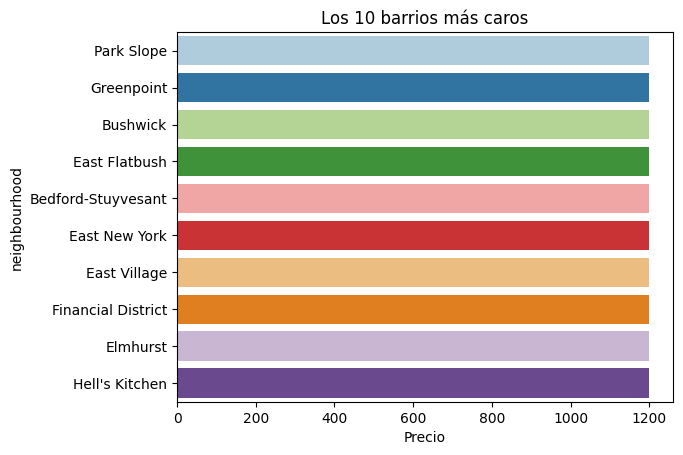

In [36]:
top_10_precios = precios_alquiler.head(10)

sns.barplot(x='price', y='neighbourhood', data=top_10_precios, palette = "Paired")
plt.title('Los 10 barrios más caros')
plt.xlabel('Precio')

Text(0.5, 0, 'Precio')

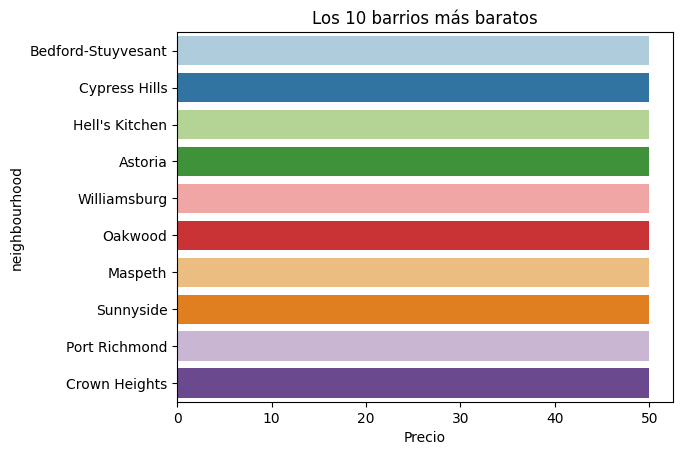

In [37]:
# Obtener los 10 valores únicos más bajos de la columna 'price'
top_10_precios_bajos = precios_alquiler.drop_duplicates(subset='neighbourhood', keep='last').tail(10)

# Crear el gráfico de barras horizontales con Seaborn
sns.barplot(x='price', y='neighbourhood', data=top_10_precios_bajos, palette='Paired')
plt.title('Los 10 barrios más baratos')
plt.xlabel('Precio')

Text(0, 0.5, 'Precio')

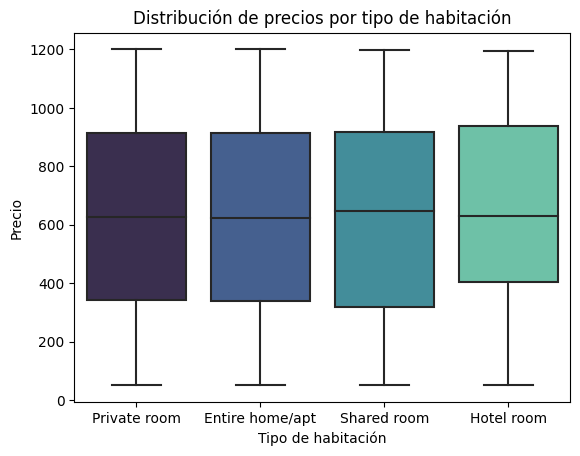

In [38]:
# Crear el gráfico de caja
sns.boxplot(x='room_type', y='price', data=df, palette='mako')
plt.title('Distribución de precios por tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Precio')

## Tarea 5b: Visualización de datos (cualquier herramienta)



- Crea un gráfico de dispersión para ilustrar la relación entre la tarifa de limpieza y el precio de la habitación y escribe el tipo de correlación que observas, si la hay.
- Crea un gráfico de líneas para mostrar la cantidad total de lugares disponibles al año.
- NUEVO =  Crea un grafico de lineas para monstrar la cantidad de casas construidas cada año

In [39]:
# Calculo de la correlación entre 'service_fee' y 'price'
np.corrcoef(df['service_fee'], df['price'])[0, 1]

0.999990905251415

<ipython-input-40-fb1e980edd00>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='service_fee', y='price', data=df, palette="mako")


Text(0, 0.5, 'Precio de la habitación')

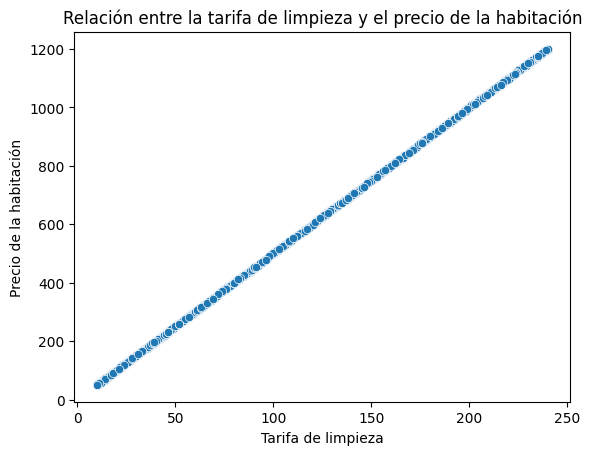

In [40]:
sns.scatterplot(x='service_fee', y='price', data=df, palette="mako")
plt.title('Relación entre la tarifa de limpieza y el precio de la habitación')
plt.xlabel('Tarifa de limpieza')
plt.ylabel('Precio de la habitación')

Existe una fuerte correlacion entre ambas variables, parece que miemtras mas caro es el precio de alquiler mas caro es el servicio de limpieza.

Text(0.5, 1.0, 'Cantidad de casas construidas cada año')

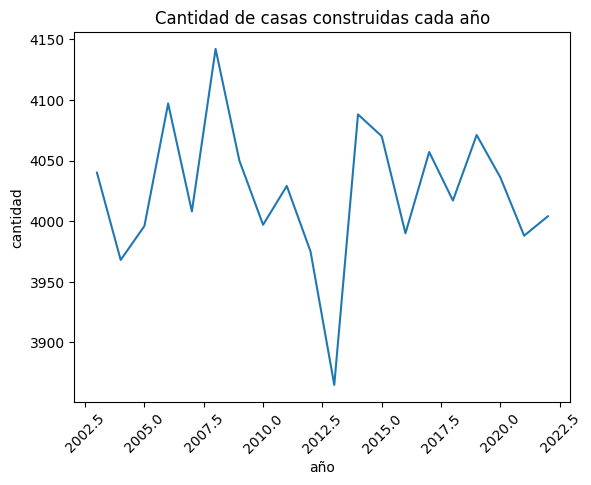

In [41]:
# Contar cuántas veces se repite cada año en la columna "construction_year"
year_counts = df['construction_year'].value_counts().reset_index()
year_counts.columns = ['año', 'cantidad']
# Convertir los años en enteros
year_counts['año'] = year_counts['año'].astype(int)

sns.lineplot(x="año", y="cantidad", data=year_counts)
plt.xticks(rotation=45)
plt.title('Cantidad de casas construidas cada año')


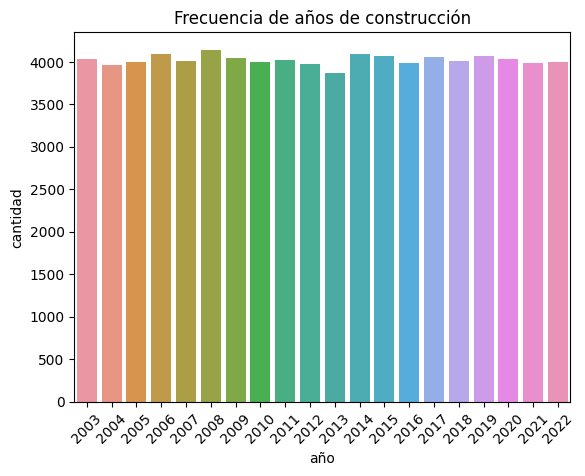

In [42]:
#Barplot con eje 0 real.

year_counts = df['construction_year'].value_counts().reset_index()
year_counts.columns = ['año', 'cantidad']

year_counts['año'] = year_counts['año'].astype(int)

# Ordenar los años en orden ascendente
year_counts = year_counts.sort_values(by='año')

# Graficar el barplot con el eje x como años enteros y el eje y como la cantidad de repeticiones
sns.barplot(x="año", y="cantidad", data=year_counts)
plt.xticks(rotation=45)
# Agregar un título al gráfico
plt.title("Frecuencia de años de construcción")

# Mostrar el gráfico
plt.show()

Comparando el lineplot con el barplot con un eje a 0 vemos que realmente cada año  las construcciones se mantienen en mas de 3800 aproximadamente, por el contrario en el lineplot podemos observar las fluctuaciones, que partiendo el eje de 3900 ya vemos que hay años en los que hay picos de construccion pero se mantienen entre 3800 y 4150 aprox.

El punto mas bajo recientemente ha sido durante el 2020, posiblemente por la pandemia del COVID, sin embargo vemos una tendencia al alza despues de 2021 posiblemente por flexibilización de las medidas tomadas en la pandemia.

## Tarea 5c: Visualización de datos (cualquier herramienta)



- Crea una visualización de datos de tu elección utilizando una de las columnas de reseñas, de forma aislada o en combinación con otra columna.
- Crea una visualización para comparar, al menos, dos variables diferentes entre superanfitriones y anfitriones normales.   
- NUEVO = Crea una visualizacion para comparar al menos, dos variables diferentes entre anfitriones verificados y no verificados.


Text(0.5, 1.0, 'Cantidad de reseñas por ratio en cada vecindario')

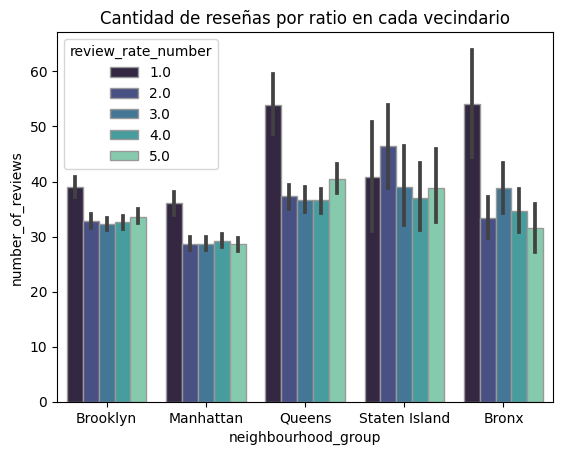

In [43]:
sns.barplot(data=df, x = "neighbourhood_group" ,y="number_of_reviews", hue="review_rate_number", palette="mako", edgecolor=".6",)
plt.title('Cantidad de reseñas por ratio en cada vecindario')

Text(0.5, 1.0, 'Numero de Reseñas por fecha')

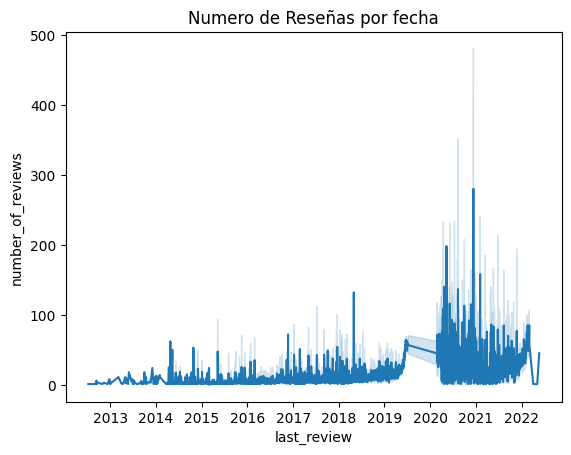

In [44]:
sns.lineplot(x = "last_review", y = "number_of_reviews", data = df)
plt.title('Numero de Reseñas por fecha')

* Parece que el numero de reseñas recibidas durante 2019-2020 (COVID), parece quedarse estancado, e incluso un sutil descenso que podria deberse a menos alquileres y mantener los alquileres que ya estab

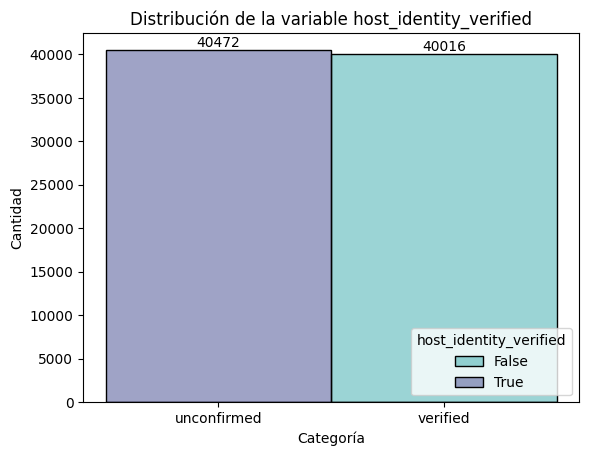

In [45]:
# Crear el histograma con Seaborn
sns.histplot(data=df, x='host_identity_verified', hue='host_identity_verified', palette='mako')

# Calcular el conteo de cada categoría
conteo_categorias = df['host_identity_verified'].value_counts()

# Añadir el valor de cada barra dentro del gráfico
for index, value in enumerate(conteo_categorias.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Agregar leyenda manualmente
plt.legend(title='host_identity_verified', loc='lower right', labels=['False', 'True'])

# Agregar etiquetas y título al gráfico
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable host_identity_verified')

# Mostrar el gráfico
plt.show()

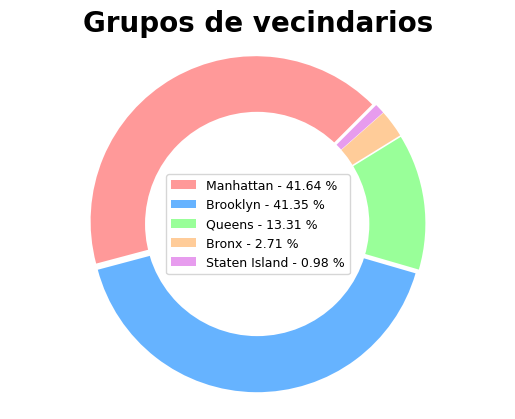

In [46]:
# Suponiendo que tienes los datos en un DataFrame llamado df y la columna es 'neighbourhood_group'
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()

# Definir keys y values para los porcentajes en la leyenda
keys = neighbourhood_group_counts.index
values = neighbourhood_group_counts.values
total_records = len(df)

# Crear el gráfico de pastel
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', "#e79cee", "#9ce7ee", "#d9ee9c"]
explodes = [0.02] * len(neighbourhood_group_counts)
plt.pie(neighbourhood_group_counts, startangle=45, explode=explodes, colors=colors)

labels = ["{0} - {1:1.2f} %".format(i, j / total_records * 100) for i, j in zip(keys, values)]
explodes = [0.02] * len(neighbourhood_group_counts)  # Ajuste el valor aquí si desea más separación

# Añadir título
plt.title('Grupos de vecindarios', fontsize=20, fontweight="bold")

# Mostrar la leyenda con los porcentajes
plt.legend(labels, loc="center", fontsize=9)

# Mostrar el gráfico
plt.axis('equal')  # Esto asegura que el gráfico de pastel sea circular

# Dibujar un círculo blanco en el centro para crear un "agujero"
center_circle = plt.Circle((0, 0), 0.68, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

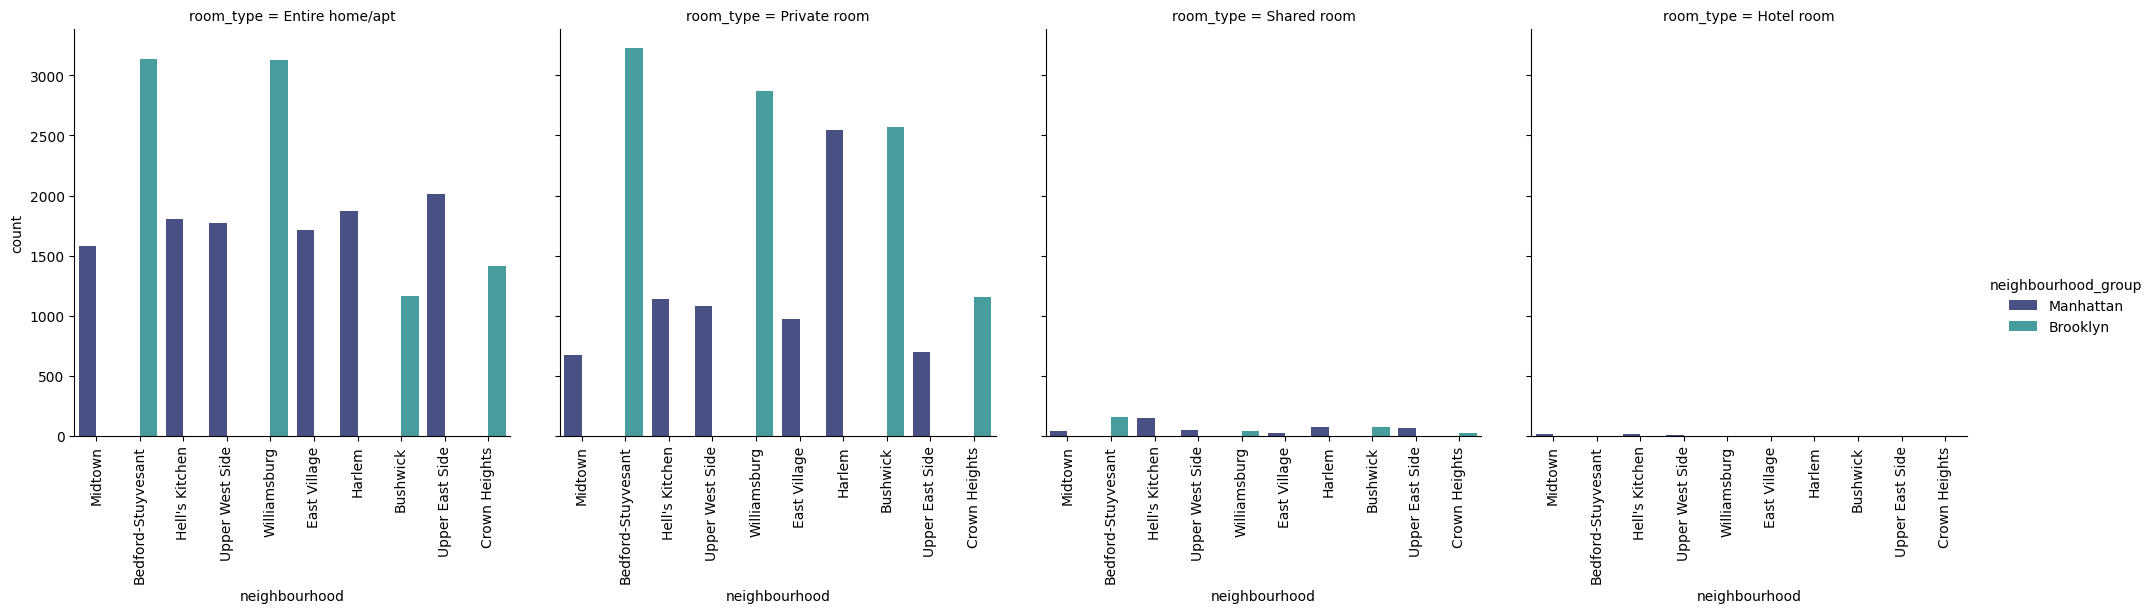

In [47]:
#Por vecindario, vemos cual tipo de habitacion se alquila  mas
# top 10 vecindarios
top_10=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type',palette='mako', data=top_10, kind='count')
viz_3.set_xticklabels(rotation=90)

<ipython-input-48-b993f0018888>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


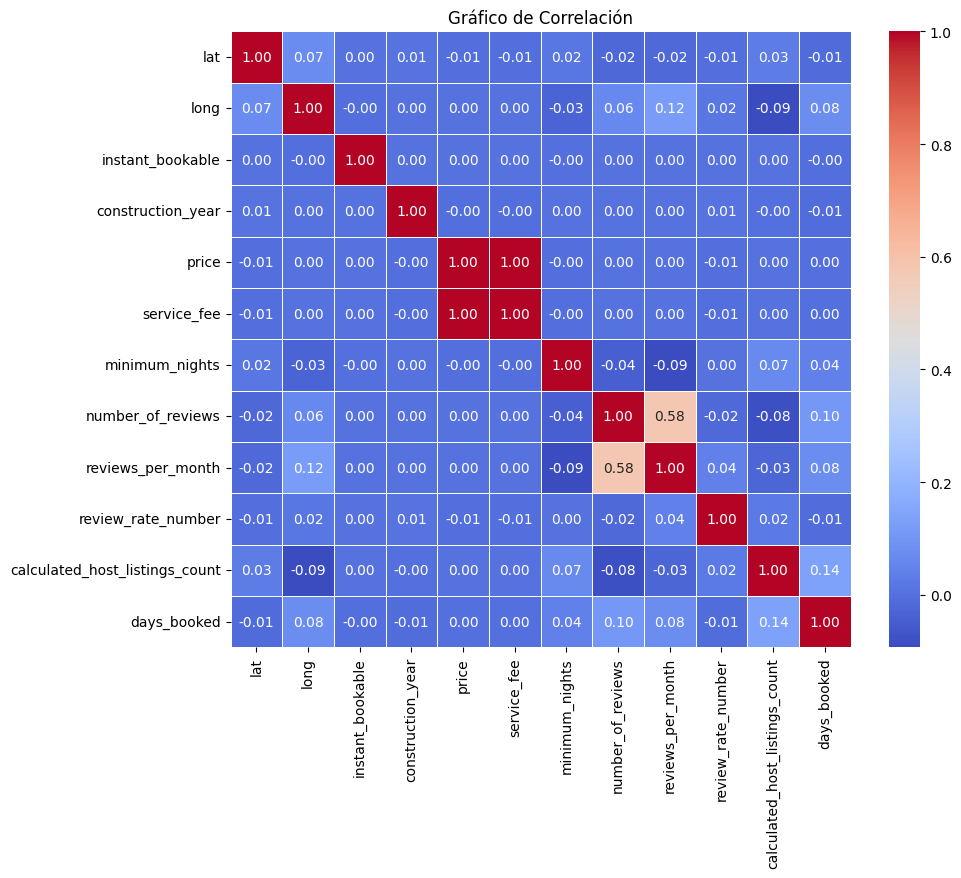

In [48]:
# Calcula la matriz de correlación para las variables numéricas en el DataFrame
matriz_correlacion = df.corr()
# Crea el gráfico de correlación utilizando un heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación")
plt.show()

* En este grafico de correlacion podemos comprobar nuevamente la perfecta correlacion positiva entre preice y service_fee
* Tambien podemos observar que las variables number_of_reviews y reviews_per_month tienen una correlacion positiva de 0.58
* En cuanto a minimum_nights vemos que tiene una correlacion negativa pequeña con reviews_per_month, un supuesto podria ser que mientras mas cantidad de noches pasen las personas hospedadas (quizas mas de un mes), menos posibilidades de dejar reseñas al mes tienes.

## Mapa de NYC grupos de vencindarios









In [49]:
import plotly.express as px

# Crear una figura de mapa utilizando Plotly Express y agregar la etiqueta de precio
fig = px.scatter_mapbox(df, lat='lat', lon='long', color="neighbourhood_group", zoom=10)

# Establecer el tipo de mapa (mapbox) y la ubicación central del mapa
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_center={"lat": 40.7128, "lon": -74.0060})

# Actualizar el estilo de los marcadores
fig.update_traces(marker=dict(size=10, opacity=0.7))

# Actualizar el texto flotante con el precio en el formato deseado
fig.update_traces(textposition='top center')

# Mostrar el mapa
fig.show()

# Mapa NYC distribución de precios

In [50]:
import plotly.express as px

# Crear una figura de mapa utilizando Plotly Express y agregar la etiqueta de precio
fig = px.scatter_mapbox(df, lat='lat', lon='long', color="price", zoom=10, text='neighbourhood_group')

# Establecer el tipo de mapa (mapbox) y la ubicación central del mapa
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_center={"lat": 40.7128, "lon": -74.0060})

# Actualizar el estilo de los marcadores
fig.update_traces(marker=dict(size=10, opacity=0.7))

# Actualizar el texto flotante con el precio en el formato deseado
fig.update_traces(textposition='top center')

# Mostrar el mapa
fig.show()
